In [74]:
import pandas as pd 
import numpy as np

In [75]:
df = pd.read_excel(r"D:\NIT Course\NIT Data Science Course\Machine Learning\Regularization\Practice\car-mpg.xlsx")
df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,1,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,1,ford ranger


In [76]:
df['origin'].unique()

array([1, 3, 2])

In [77]:
# map the value of the origin to the 
# 1: 'America' , 2 : 'Europe', 3 : 'Asia'
df['origin'] = df['origin'].map({1 : 'America', 2: 'Europe', 3 : 'Asia'})

In [78]:
df['origin'].unique()

array(['America', 'Asia', 'Europe'], dtype=object)

In [79]:
# now encode the value of the origin to fit in the machine learning model 
df = pd.get_dummies(data = df, columns = ['origin'], dtype= int)

In [80]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,car_name,origin_America,origin_Asia,origin_Europe
0,18.0,8,307.0,130,3504,12.0,70,0,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,buick skylark 320,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,plymouth satellite,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,amc rebel sst,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,ford torino,1,0,0


In [81]:
# replace he ? with nan
df = df.replace('?', np.nan)

C:\Users\vrush\AppData\Local\Temp\ipykernel_10064\1206963213.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('?', np.nan)


In [82]:
df.isnull().sum()

mpg               0
cyl               0
disp              0
hp                6
wt                0
acc               0
yr                0
car_type          0
car_name          0
origin_America    0
origin_Asia       0
origin_Europe     0
dtype: int64

In [83]:
# fit  the null value with median 
df = df.drop(columns = {'car_name'})
df = df.apply(lambda x : x.fillna(x.median()), axis = 0)

In [84]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_America,origin_Asia,origin_Europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,1,0,0


In [85]:
# seperate the dependent and independent variable 
X = df.drop(columns = {'mpg'}) # independent variable 
y = df[['mpg']] # dependent variable

In [86]:
X

,cyl,disp,hp,wt,acc,yr,car_type,origin_America,origin_Asia,origin_Europe
0,8,307.0,130.0,3504,12.0,70,0,1,0,0
1,8,350.0,165.0,3693,11.5,70,0,1,0,0
2,8,318.0,150.0,3436,11.0,70,0,1,0,0
3,8,304.0,150.0,3433,12.0,70,0,1,0,0
4,8,302.0,140.0,3449,10.5,70,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1,1,0,0
394,4,97.0,52.0,2130,24.6,82,1,0,0,1
395,4,135.0,84.0,2295,11.6,82,1,1,0,0
396,4,120.0,79.0,2625,18.6,82,1,1,0,0


In [87]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


#### Scale the Data X and y 

In [88]:
from sklearn import preprocessing 

# scale the independent variable 
X_s = preprocessing.scale(X)
X_s = pd.DataFrame(X_s, columns = X.columns)

# scale the dependent variable 
y_s = preprocessing.scale(y)

y_s = pd.DataFrame(y_s, columns= y.columns)



In [89]:
X_s

,cyl,disp,hp,wt,acc,yr,car_type,origin_America,origin_Asia,origin_Europe
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
...,...,...,...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,0.941412,0.773559,-0.497643,-0.461968
394,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983,0.941412,-1.292726,-0.497643,2.164651
395,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983,0.941412,0.773559,-0.497643,-0.461968
396,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983,0.941412,0.773559,-0.497643,-0.461968


### split the data into training and testing data sets

In [91]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size = 0.2, random_state = 42)

###  Create a Model using Linear Regression 

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'Linear Regression Model r2 score : {r2_score(y_test, y_pred)}')
print(f'Linear Regression model RMSE : {root_mean_squared_error(y_test, y_pred)}')
print()
for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, model.coef_[0][idx]))
    
intercept = model.intercept_[0]
print('The intercept is {}'.format(intercept))

Linear Regression Model r2 score : 0.8646461602476287
Linear Regression model RMSE : 0.3455839385439967

The coefficient for cyl is 0.3014890106542703
The coefficient for disp is 0.23865508872933516
The coefficient for hp is -0.1788628154078022
The coefficient for wt is -0.687430237167777
The coefficient for acc is 0.026677432411206594
The coefficient for yr is 0.37183923462043045
The coefficient for car_type is 0.348559870499536
The coefficient for origin_America is -0.0784897729772255
The coefficient for origin_Asia is 0.05432564688376125
The coefficient for origin_Europe is 0.042859441346643594
The intercept is -0.000713935051102569


### Use the Regularization 
### 1. Ridge Regularization 
### ---> it add the square of the coefficient value as  a penalty to the loss 
### ---> loss = Original Loss + lambda * (M)**2

In [104]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.03) # alpha is the hyperparameter which decide the strength/weakness of the Ridge Regularization

ridge.fit(X_train, y_train)
ridge.predict(X_test)

print(f"Coefficient of the Ridge Model : {ridge.coef_}")
print(f"Intercept of the Ridge Model : {ridge.intercept_}")

print()

print(f'R2 score of the Ridge model : {r2_score(y_test, y_pred)}')
print(f'RMSE of the Ridge model : {root_mean_squared_error(y_test, y_pred)}')

Coefficient of the Ridge Model : [ 0.30101973  0.23793723 -0.17885329 -0.686675    0.02653259  0.37175041
  0.34822255 -0.07846639  0.05432869  0.04282653]
Intercept of the Ridge Model : [-0.00072219]

R2 score of the Ridge model : 0.8646461602476287
RMSE of the Ridge model : 0.3455839385439967


### Using the Lasso Regression 
### loss = Original Loss + lambda * (M)
### It add the absolute value of the coefficient as an penalty to the model 
### It Sometime Shrink the coefficient to exactly 0 thus it is also used as an feature selection 


In [113]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

print(f'Coefficient : {lasso.coef_}')
print(f'Intercept : {lasso.intercept_}')

print(f"r2 score : {r2_score(y_test, y_pred)}")

print(f'RMSE : {root_mean_squared_error(y_test, y_pred)}')

Coefficient : [ 0.15947197  0.         -0.0820716  -0.55834028  0.          0.35681926
  0.21459298 -0.10122988  0.00387386  0.        ]
Intercept : [-0.0008543]
r2 score : 0.8588068170718538
RMSE : 0.3529597019180181


In [115]:
linearRegression = model.coef_
ridgeregression = ridge.coef_
lassoregression = lasso.coef_


linearRegression = linearRegression.ravel()
ridgeregression = ridgeregression.ravel()
lassoregression = lassoregression.ravel()

In [117]:

print('This Result for alpha value 0.01')
comparation = pd.DataFrame({
    'Linear Regresison Coefficient' : linearRegression,
    'Ridge Regression Coefficient' : ridgeregression,
    'Lasso Regression Coefficient' : lassoregression
})
comparation

This Result for alpha value 0.01


,Linear Regresison Coefficient,Ridge Regression Coefficient,Lasso Regression Coefficient
0,0.301489,0.301020,0.159472
1,0.238655,0.237937,0.000000
2,-0.178863,-0.178853,-0.082072
3,-0.687430,-0.686675,-0.558340
4,0.026677,0.026533,0.000000
5,0.371839,0.371750,0.356819
6,0.348560,0.348223,0.214593
7,-0.078490,-0.078466,-0.101230
8,0.054326,0.054329,0.003874
9,0.042859,0.042827,0.000000


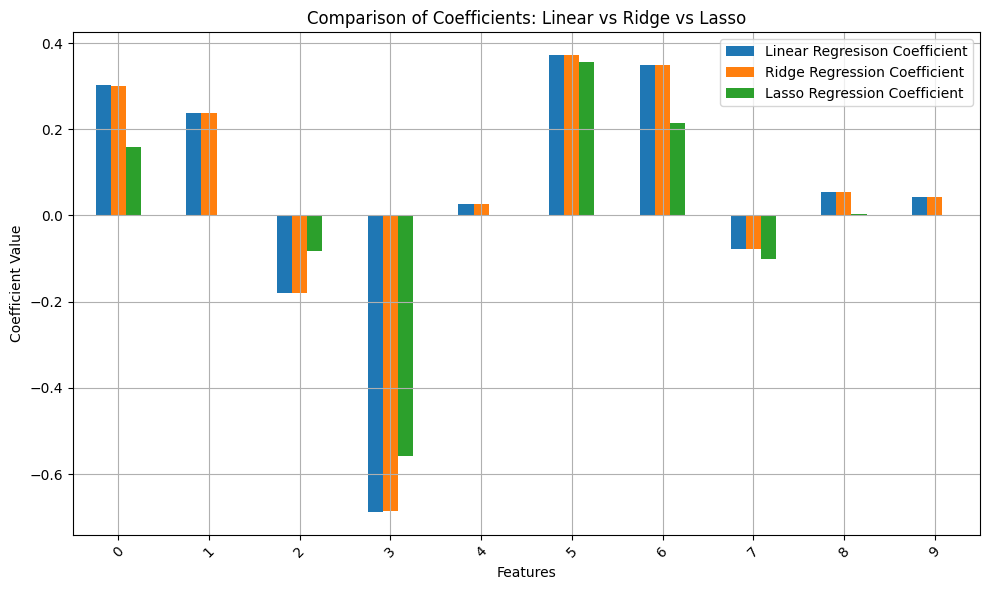

In [121]:
import matplotlib.pyplot as plt
comparation.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Coefficients: Linear vs Ridge vs Lasso')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("regularization_out.png")  # Save to repo folder
plt.show()